<img src="images/svm.png" alt="drawing" width="1000"/>

# **Support Vector Machine**

Import all relevant libraries, and define useful functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
def plot_svm_boundary(model,X,y, ax=None):
    '''
    plot scatterplot and svm model boundaries
    
    based on:
    https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    '''
    
    if ax == None:
        ax = plt.gca()
    
    X = X.values
    y = y.values
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='coolwarm', alpha=0.5)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.65, linestyles=['--', '-', '--'])
    
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    # plt.show()

In [3]:
def error_evaluation(y_test, y_test_predictions):
    MAE = mean_absolute_error(y_test, y_test_predictions)
    RMSE = np.sqrt(mean_squared_error(y_test, y_test_predictions))
    print(f'MAE = {round(MAE, 2)}')
    print(f'RMSE = {round(RMSE, 2)}')

## SVM Classification

In [4]:
mouse = pd.read_csv('data/mouse_viral_study.csv')
mouse.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
X = mouse.drop('Virus Present', axis='columns')
y = mouse['Virus Present']

### Linear Kernel

A linear kernel does not map to a higher dimension, and is (essentially) the same as not using a kernel

$K(x_i, x_j) = x_i \cdot x_j$

The $C$ parameter is a penalty term and decides how "soft" the margins are. For large values of $C$ hard margins are used, the lower the value of $C$ the softer the margins

d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


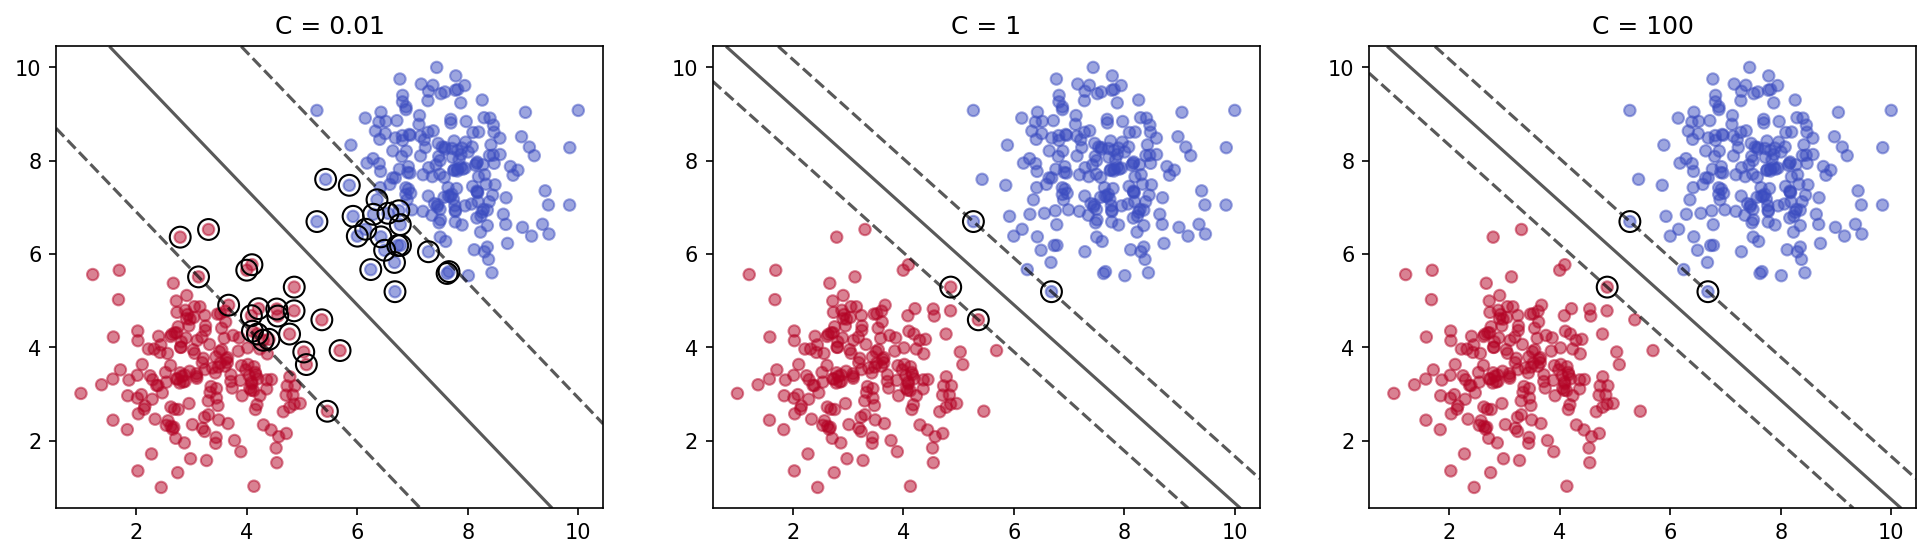

In [6]:
def linear_svm(C, ax):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    plot_svm_boundary(model, X, y, ax=ax)
    ax.set_title(f'C = {C}')

fig, ax = plt.subplots(1, 3, dpi=150, figsize=(16,4))

linear_svm(C=0.01, ax=ax[0])
linear_svm(C=1, ax=ax[1])
linear_svm(C=100, ax=ax[2])

plt.show()

### Polynomial Kernel

A polynomial kernel maps to a quadratic, cubic, or higher dimensional space. 

$K(\bar x_i, \bar x_j) = (\gamma (\bar x_i \cdot \bar x_j) + r)^d$

The degree $d$ determines how curved the higher dimensional space is, however for this data set it does not matter too much, only at $d=4$ is there  slight curvature of the re-projected hyperplane

d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


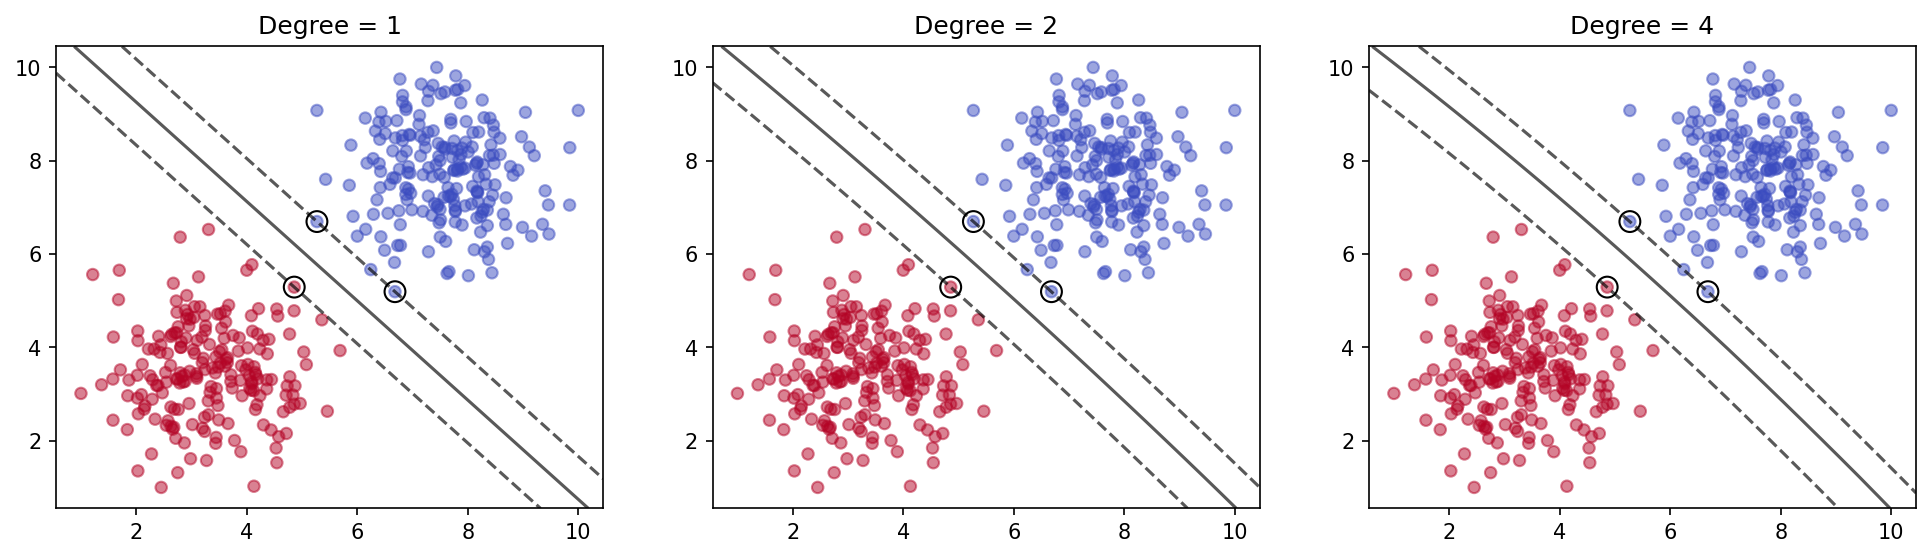

In [7]:
def poly_svm(d, ax):
    model = SVC(kernel='poly', C=100, degree=d)
    model.fit(X, y)
    plot_svm_boundary(model, X, y, ax=ax)
    ax.set_title(f'Degree = {d}')
    
fig, ax = plt.subplots(1, 3, dpi=150, figsize=(16,4))

poly_svm(d=1, ax=ax[0])
poly_svm(d=2, ax=ax[1])
poly_svm(d=4, ax=ax[2])

plt.show()

### RBF Kernel

A Radial Basis Function (RBF) kernel maps to radial space.

$K(\bar x_i, \bar x_j) = e^{-\gamma (\bar x_i - \bar x_j)}$

The $\gamma$ factor can be seen as the inverse of the radius of influence of the support vectors. If you choose it too high you will have too much variance in your model. $\gamma$ can be a user chosen float value, or can be set to "scale" or "auto" to let the scikit learn choose a value based on:

scale = $\frac{1}{n_{features} \cdot Var(X)}$

auto = $\frac{1}{n_{features}}$

"scale" is the default and happens to be the best option for this data set, "auto" has too much variance. 

d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


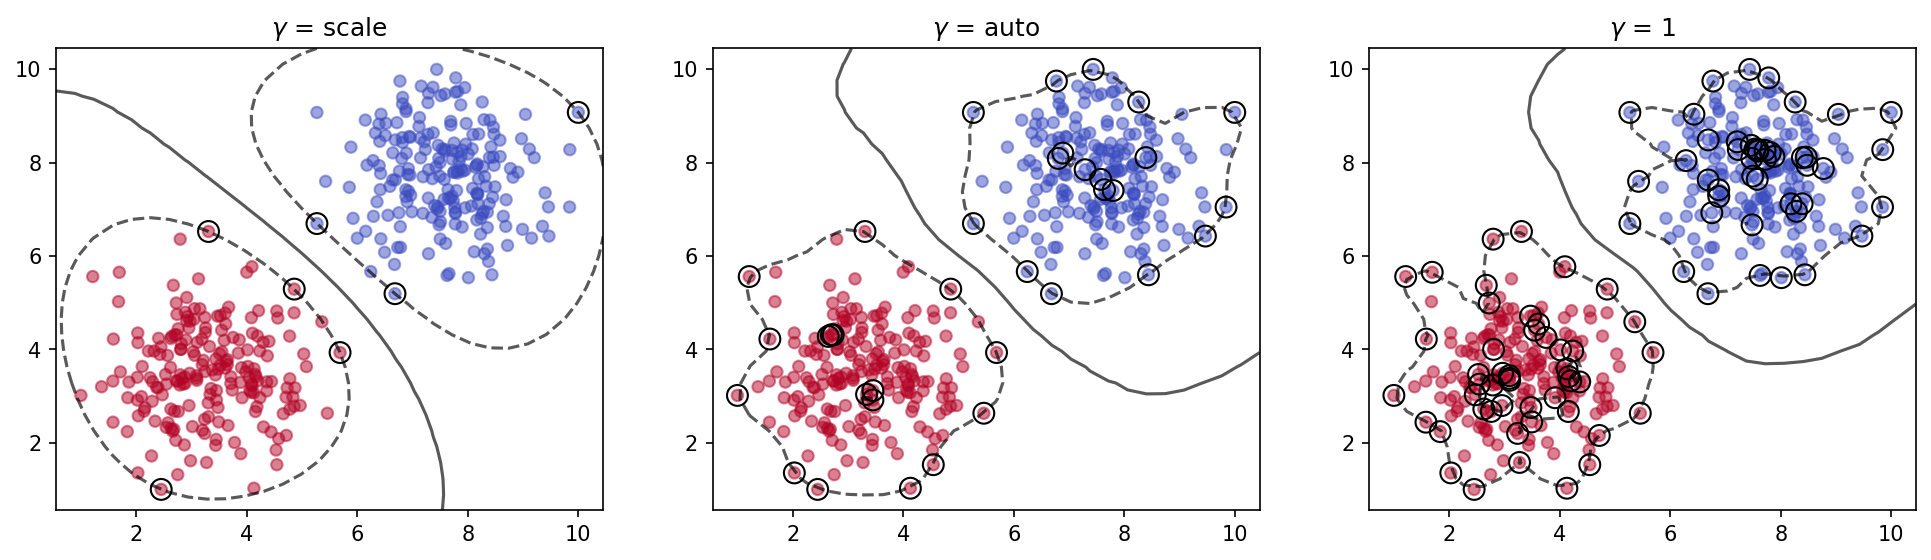

In [8]:
def rbf_svm(g, ax):
    model = SVC(kernel='rbf', C=10, gamma=g)
    model.fit(X, y)
    plot_svm_boundary(model, X, y, ax=ax)
    ax.set_title(f'$\gamma$ = {g}')
    
fig, ax = plt.subplots(1, 3, dpi=150, figsize=(16,4))

rbf_svm(g='scale', ax=ax[0])
rbf_svm(g='auto', ax=ax[1])
rbf_svm(g=1, ax=ax[2])

plt.show()


### Sigmoid

A sigmoid kernel is based on an algorithm used in an artificial neural network (ANN). It should work quite well for a SVM but has not yet seen wide spread use.

$K(\bar x_i,\bar x_j) = tanh(\gamma (\bar x_i \cdot \bar x_j) + r)$

$\gamma$ can be a user chosen float value, or can be set to "scale" or "auto" to let the scikit learn choose a value based on:

scale = $\frac{1}{n_{features} \cdot Var(X)}$

auto = $\frac{1}{n_{features}}$


d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


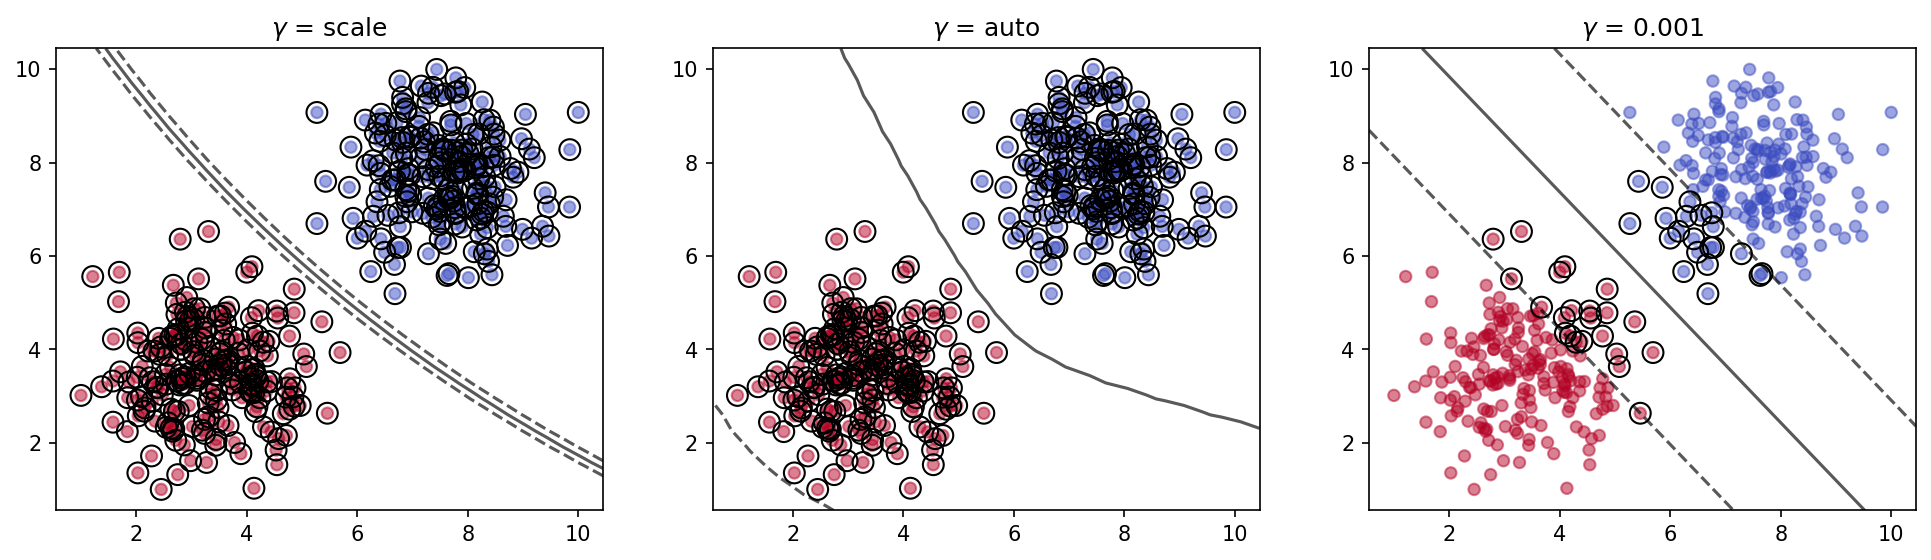

In [9]:
def sigmoid_svm(g, ax):
    model = SVC(kernel='sigmoid', C=10, gamma=g)
    model.fit(X, y)
    plot_svm_boundary(model, X, y, ax=ax)
    ax.set_title(f'$\gamma$ = {g}')
    
fig, ax = plt.subplots(1, 3, dpi=150, figsize=(16,4))

sigmoid_svm(g='scale', ax=ax[0])
sigmoid_svm(g='auto', ax=ax[1])
sigmoid_svm(g=0.001, ax=ax[2])

plt.show()

### Grid Search Cross-Validation

In [10]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [11]:
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
grid.best_estimator_

SVC(C=0.01, kernel='linear')

## SVM Regression

In [12]:
cement = pd.read_csv("data/cement_slump.csv")
cement.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

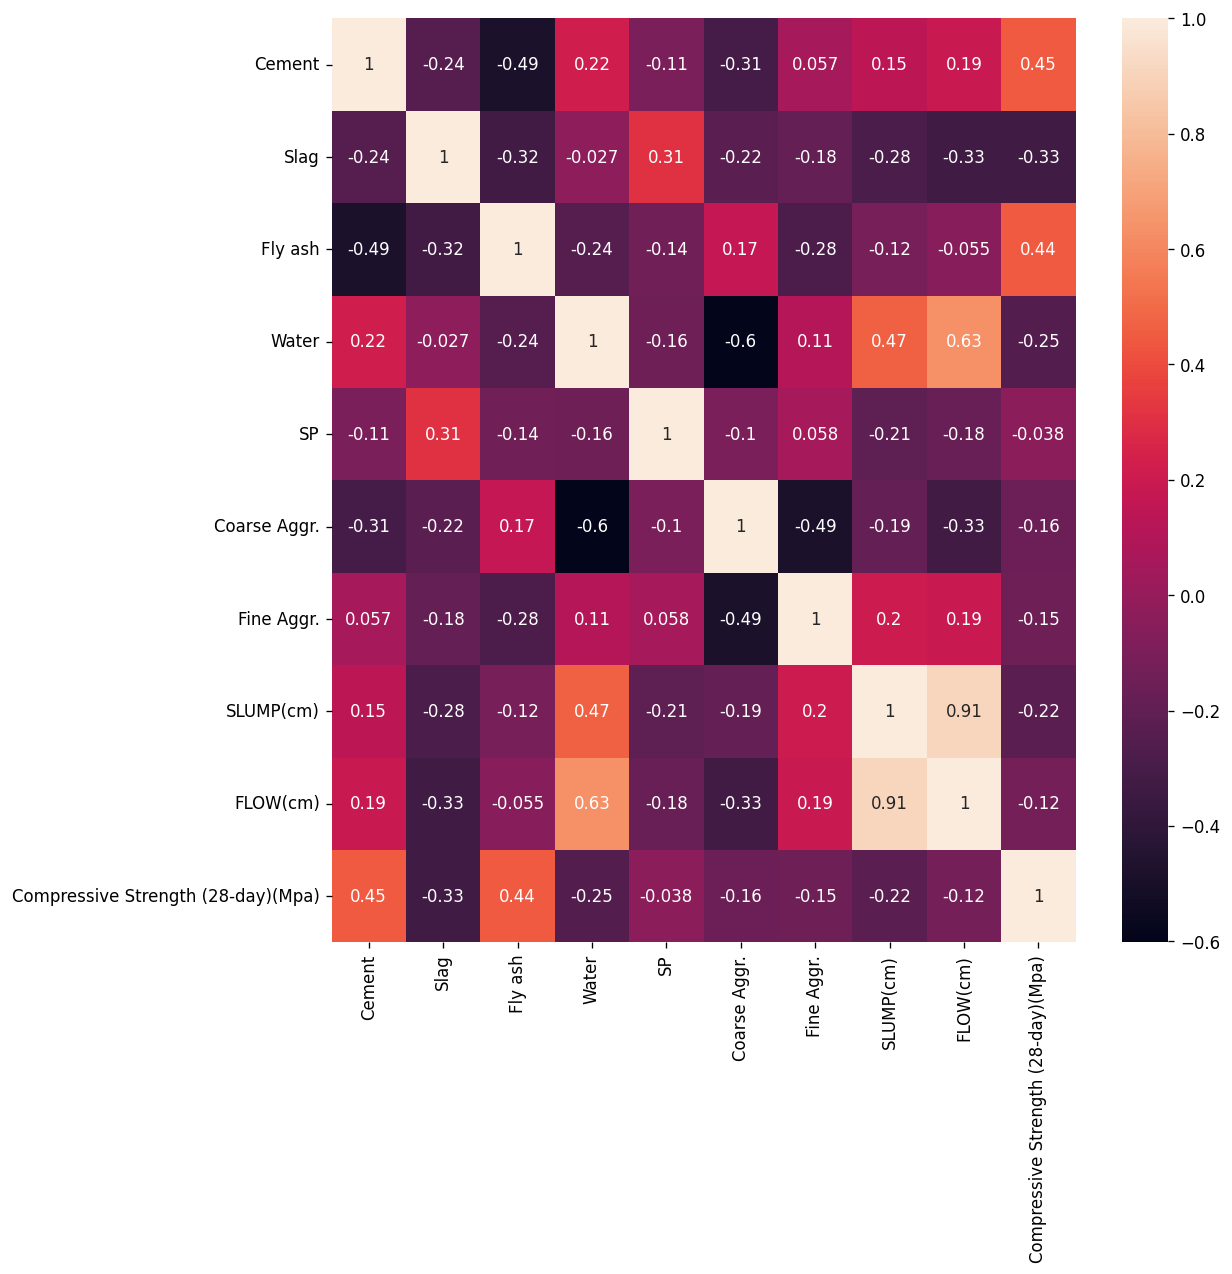

In [13]:
plt.figure(dpi=120, figsize=(10,10))
sns.heatmap(cement.corr(), annot=True)

In [14]:
X = cement.drop('Compressive Strength (28-day)(Mpa)', axis='columns')
y = cement['Compressive Strength (28-day)(Mpa)']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

LinearSVR is very fast, but can only use a linear kernel

In [16]:
base_model = SVR()
base_model.fit(X_train_scaled, y_train)

SVR()

In [17]:
base_preds = base_model.predict(X_test_scaled)
error_evaluation(y_test, base_preds)

MAE = 5.24
RMSE = 6.7


In [18]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4],
              'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

svr = SVR()
grid = GridSearchCV(svr, param_grid)
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [19]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [20]:
grid_pred = grid.predict(X_test_scaled)
error_evaluation(y_test, grid_pred)

MAE = 2.51
RMSE = 3.18
